In [1]:
from datetime import datetime

import pandas as pd
import numpy as np

from clasificacion_humedales.utils.images_preprocessor import preprocess
from clasificacion_humedales.utils.signatures import Signatures
from clasificacion_humedales.utils.utils_maia import load_from_file, directories, read_clustering, read_image

In [6]:
PATH_IN, PATH_OUT = directories()
PATH_MAP_GT = PATH_OUT + 'clustering_gt/mapa_gt_clustered.tif'

Cargamos nuestra imagen original y las fechas.

In [7]:
stack_ndvi = preprocess(read_image(PATH_IN + 'stack-ramsar.tif'))

metadata = pd.read_csv(PATH_IN + 'MYD13Q1-006-Statistics.csv')
all_dates = metadata['Date']
all_dates = np.array([datetime.strptime(date, "%Y-%m-%d") for date in all_dates])

Cargamos nuestro clustering

In [9]:
clustering_gt = read_clustering(PATH_MAP_GT).flatten()

Firmas temporales

In [10]:
PATH_OUT += 'signatures/'

In [11]:
temporal_signatures_gt = Signatures(stack_ndvi, all_dates, clustering_gt, 'Fecha', 'NDVI')

In [13]:
from clasificacion_humedales.utils.compare import percentage_of_each_cluster
percentages = percentage_of_each_cluster(clustering_gt)
[clase for clase, percentage in percentages.items() if percentage<2]

[4, 5, 11, 12, 13, 18, 21, 23]

In [14]:
percentages

{0: 4.504342751980609,
 1: 9.035617299189802,
 2: 7.718203649258253,
 3: 4.971160535942725,
 4: 0.8887492425432592,
 5: 0.46681778396211593,
 6: 2.462014947146352,
 7: 3.406872096415827,
 8: 2.2577821666629263,
 9: 2.4507933658011085,
 10: 3.2318154274300332,
 11: 1.8066745965841506,
 12: 1.1962205714029222,
 13: 1.8942029310770474,
 14: 4.531274547209192,
 15: 14.536436474628005,
 16: 3.2520142738514712,
 17: 2.607895504634513,
 18: 1.0638059115290526,
 19: 3.51684359359921,
 20: 2.141077720672397,
 21: 1.7528110061269835,
 22: 4.555962026168728,
 23: 1.7887200664317615,
 24: 10.936553179073995,
 25: 3.025338330677559}

In [15]:
firma_1 = temporal_signatures_gt.create_for(21, np.mean)
firma_2 = temporal_signatures_gt.create_for(22, np.mean)

<AxesSubplot:xlabel='Fecha', ylabel='NDVI'>

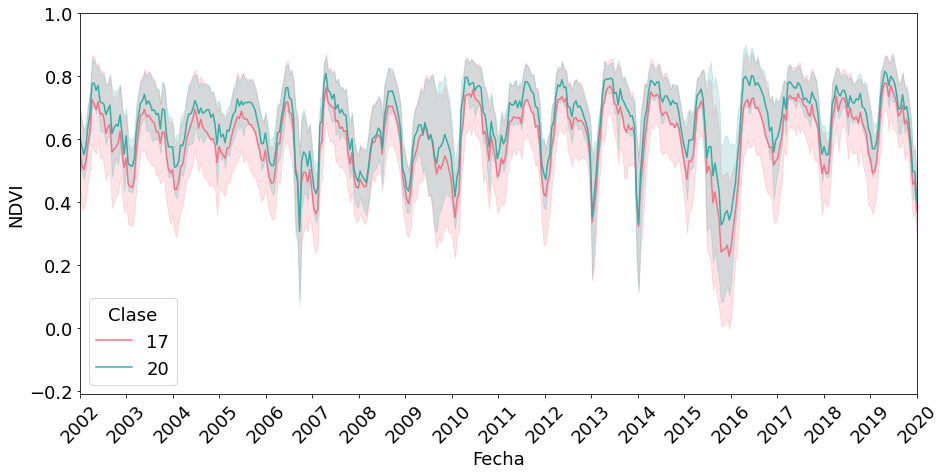

In [24]:
temporal_signatures_gt.plot_for_mean([17, 20])